In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Summary Statistics

In [3]:
walmart = pd.read_pickle('Datasets/walmart_sales.pkl.bz2')
walmart.head(100)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
3,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
4,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106
...,...,...,...,...,...,...,...,...,...
95,1,A,24,2010-02-12,8050.24,True,3.616667,0.673111,8.106
96,1,A,25,2010-02-12,13268.75,True,3.616667,0.673111,8.106
97,1,A,26,2010-02-12,10050.92,True,3.616667,0.673111,8.106
98,1,A,27,2010-02-12,2339.50,True,3.616667,0.673111,8.106


In [41]:
walmart['type'].unique()

array(['A', 'B', 'C'], dtype=object)

### 2.1.1 Summary Statistics for Numerical Column
mean(), median(), mode(), min(), max(), std(), var(), sum(), quantile()

In [25]:
walmart['weekly_sales'].quantile(0.3)
walmart['weekly_sales'].mean()
walmart['weekly_sales'].median()
walmart['weekly_sales'].mode()
walmart['weekly_sales'].min()
walmart['weekly_sales'].max()
walmart['weekly_sales'].sum()
walmart['weekly_sales'].std()
walmart['weekly_sales'].var()

521909341.7459299

### 2.1.1 Summary Statistics for Date Column

In [26]:
walmart['date'].max()

Timestamp('2012-10-26 00:00:00')

### 2.1.3 The agg() method

In [31]:
def pct45(column):
    return column.quantile(0.45)
def sum_of(column):
    return column.sum()
# agg() on a single column
walmart['weekly_sales'].agg(pct45)
# agg() on multiple column
walmart[['weekly_sales', 'temperature_c']].agg(pct45)
# agg() on multiple column and using multiple summary
walmart[['weekly_sales', 'temperature_c']].agg([sum_of, pct45])
# agg() can also be used on a dataframe as well
walmart.agg([sum_of, pct45])

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
sum_of,8978789.0,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,18246209.0,NaT,6.649037e+09,29063.0,6.458002e+06,366667.527692,3282739.182
pct45,19.0,NaN,33.0,2011-04-29,6.212793e+03,0.0,1.508333e+01,0.882599,7.682


### 2.1.4 Cumulative Summary Statistics
.cumsum()
.cummin()
.cummax()
.cumprod()

In [36]:
walmart[['weekly_sales', 'temperature_c']].cumsum()
walmart[['weekly_sales', 'temperature_c']].cummin()
walmart[['weekly_sales', 'temperature_c']].cumprod()

,weekly_sales,temperature_c
0,2.492450e+04,5.727778
1,1.261311e+09,32.807438
2,1.733057e+13,187.913716
3,6.924261e+17,1076.328006
4,2.231646e+22,6164.967634
...,...,...
413114,NaN,-inf
413115,NaN,-inf
413116,NaN,-inf
413117,NaN,-inf


# 2.2 Counting

In [5]:
walmart.groupby(by='store')['department'].value_counts()

store  department
1      1             143
       2             143
       3             143
       4             143
       5             143
                    ... 
45     5             143
       6             143
       7             143
       8             143
       9              42
Name: department, Length: 3266, dtype: int64

In [6]:
walmart.drop_duplicates(subset=['store', 'department', 'date'])

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
3,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
4,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106
...,...,...,...,...,...,...,...,...,...
413114,45,B,4,2012-10-26,24627.94,False,14.916667,1.025516,8.667
413115,45,B,5,2012-10-26,13256.59,False,14.916667,1.025516,8.667
413116,45,B,6,2012-10-26,1086.31,False,14.916667,1.025516,8.667
413117,45,B,7,2012-10-26,20356.73,False,14.916667,1.025516,8.667


In [9]:
walmart['date'].max()

Timestamp('2012-10-26 00:00:00')

(array([733773., 733893., 734016., 734138., 734258., 734381., 734503.,
        734624., 734747.]),
 <a list of 9 Text major ticklabel objects>)

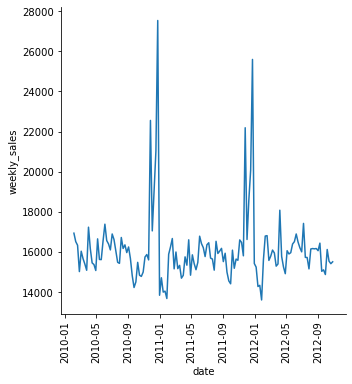

In [15]:
# weekly sales trend
sns.relplot(x='date', y='weekly_sales', data=walmart, kind='line', ci=None)
plt.xticks(rotation=90)

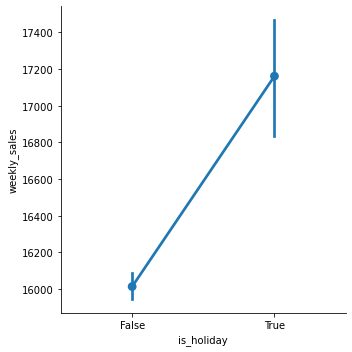

In [20]:
sns.catplot(x='is_holiday', y='weekly_sales', data=walmart, kind='point')